In [1]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
from wordcloud import WordCloud


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# Ajouter le dossier parent du projet au path
sys.path.append(os.path.abspath("../")) 

# Ensuite appliquer le nettoyage
from src.preprocessing import clean_text



In [3]:
# Charger les données si ce n'est pas déjà fait
df = pd.read_csv("../data/tweets.csv")

In [4]:
df['clean_text'] = df['text'].apply(clean_text)

In [5]:
df[['text', 'clean_text']].head(-10)

,text,clean_text
0,Our Deeds are the Reason of this #earthquake M...,deed reason may allah forgiv
1,Forest fire near La Ronge Sask. Canada,forest fire near rong sask canada
2,All residents asked to 'shelter in place' are ...,resid ask shelter place notifi offic evacu she...
3,"13,000 people receive #wildfires evacuation or...",peopl receiv evacu order california
4,Just got sent this photo from Ruby #Alaska as ...,got sent photo rubi smoke pour school
...,...,...
7598,Father-of-three Lost Control of Car After Over...,fatherofthre lost control car overtak collid
7599,1.3 #Earthquake in 9Km Ssw Of Anza California ...,ssw anza california user download earthquak ap...
7600,Evacuation order lifted for town of Roosevelt:...,evacu order lift town roosevelt
7601,#breaking #LA Refugio oil spill may have been ...,refugio oil spill may costlier bigger project


In [6]:
#Nombre total de tokens

all_tokens = " ".join(df['clean_text']).split()
print("Nombre total de tokens :", len(all_tokens))

Nombre total de tokens : 60954


In [7]:
#Tokens uniques et hapax

from collections import Counter

token_counts = Counter(all_tokens)
print("Nombre de tokens uniques :", len(token_counts))
hapax = [t for t, c in token_counts.items() if c == 1]
print("Nombre de tokens apparaissant une seule fois :", len(hapax))

Nombre de tokens uniques : 10187
Nombre de tokens apparaissant une seule fois : 5581


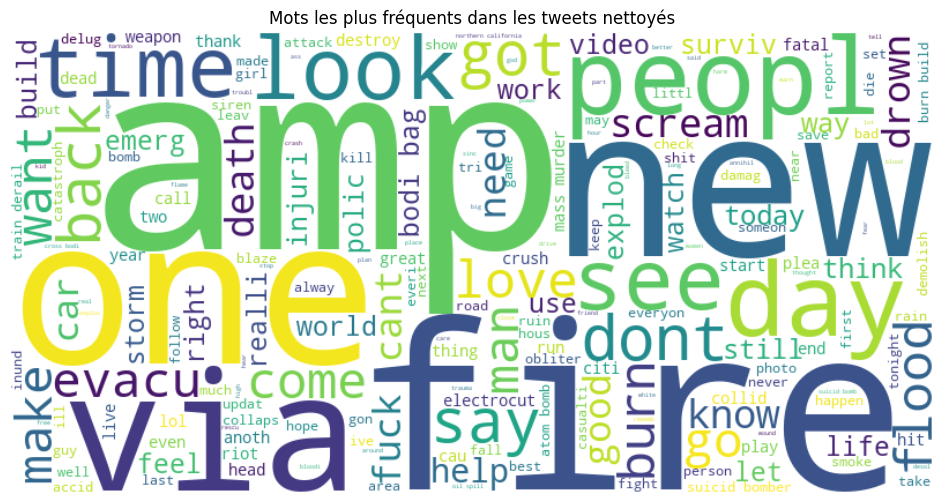

In [8]:
#WordCloud des mots les plus fréquents


wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(all_tokens))

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Mots les plus fréquents dans les tweets nettoyés")
plt.show()

In [9]:
from src.modeling import train_and_evaluate

# Sans validation croisée
res = train_and_evaluate(df, test_size=0.2, random_state=42)
print("Accuracy:", res['scores']['accuracy'])
print("Classification report :")

import pandas as pd
pd.DataFrame(res['scores']['report']).T


Accuracy: 0.7918581746552856
Classification report :


,precision,recall,f1-score,support
0,0.816514,0.819333,0.817921,869.000000
1,0.758833,0.755352,0.757088,654.000000
accuracy,0.791858,0.791858,0.791858,0.791858
macro avg,0.787673,0.787342,0.787504,1523.000000
weighted avg,0.791745,0.791858,0.791798,1523.000000


In [10]:
from src.modeling import train_and_evaluate

# Avec validation croisée 5‑folds
res =train_and_evaluate(df, test_size=0.2, random_state=42, cv=5)
print("F1‑score CV moyen :", res['cv_scores']['mean_f1'])
print("Écart‑type CV        :", res['cv_scores']['std_f1'])

# 2) Affichage du rapport de classification sur le jeu de test
import pandas as pd
pd.DataFrame(res['scores']['report']).T

F1‑score CV moyen : 0.6321620332711154
Écart‑type CV        : 0.04181685133554703


,precision,recall,f1-score,support
0,0.816514,0.819333,0.817921,869.000000
1,0.758833,0.755352,0.757088,654.000000
accuracy,0.791858,0.791858,0.791858,0.791858
macro avg,0.787673,0.787342,0.787504,1523.000000
weighted avg,0.791745,0.791858,0.791798,1523.000000


In [12]:
from src.modeling import train_and_evaluate
from sklearn.svm import SVC

# Définir le modèle SVM
svm_model = SVC(kernel='linear', probability=True)

# Évaluation simple sans cross-validation
res_svm = train_and_evaluate(df, test_size=0.2, random_state=42, model=svm_model)

# Affichage
print("Accuracy SVM:", res_svm['scores']['accuracy'])

import pandas as pd
pd.DataFrame(res_svm['scores']['report']).T

Accuracy SVM: 0.8010505581089954


,precision,recall,f1-score,support
0,0.801064,0.866513,0.832504,869.000000
1,0.801029,0.714067,0.755053,654.000000
accuracy,0.801051,0.801051,0.801051,0.801051
macro avg,0.801046,0.790290,0.793778,1523.000000
weighted avg,0.801049,0.801051,0.799245,1523.000000


In [11]:
from src.modeling import train_and_evaluate
from sklearn.svm import SVC

svm_model = SVC(kernel='linear', probability=True)

res = train_and_evaluate(df, model=svm_model, cv=5)

print("F1‑score CV moyen :", res['cv_scores']['mean_f1'])
print("Écart‑type CV     :", res['cv_scores']['std_f1'])

import pandas as pd
pd.DataFrame(res['scores']['report']).T

F1‑score CV moyen : 0.6018638906048455
Écart‑type CV     : 0.04976018303940516


,precision,recall,f1-score,support
0,0.801064,0.866513,0.832504,869.000000
1,0.801029,0.714067,0.755053,654.000000
accuracy,0.801051,0.801051,0.801051,0.801051
macro avg,0.801046,0.790290,0.793778,1523.000000
weighted avg,0.801049,0.801051,0.799245,1523.000000


In [10]:
import joblib
import os
import sys
import pandas as pd

# Chemin absolu vers le dossier racine de ton projet
project_root = os.path.abspath("..")  # ajuste selon la position de ton notebook

if project_root not in sys.path:
    sys.path.insert(0, project_root)

from src.modeling import train_and_evaluate

# Exemple minimal de dataset
data = {
    "clean_text": [
        "There is a fire in the city center!",
        "I love watching movies on weekends.",
        "Floods destroyed many houses last night.",
        "Just had the best pizza ever!"
    ],
    "target": [1, 0, 1, 0]
}
df = pd.DataFrame(data)

# Entraînement et évaluation
result = train_and_evaluate(df, text_col="clean_text", target_col="target", test_size=0.5)

# Récupérer le pipeline entraîné
pipeline = result['pipeline']

# Créer le dossier models s'il n'existe pas
os.makedirs('models', exist_ok=True)

# Sauvegarder le pipeline
joblib.dump(pipeline, 'models/tweet_classifier.pkl')
print("Modèle sauvegardé dans models/tweet_classifier.pkl")

Modèle sauvegardé dans models/tweet_classifier.pkl
